In [3]:
import pandas as pd
import numpy as np
from googletrans import Translator
import time,string

In [2]:
df=pd.read_csv('preprocessed_data_1.csv')

In [3]:
df.head()

,Unnamed: 0,review_date,review_text,rating,mrp,country,product_id
0,0,2023-11-20,Just upgraded from i5 9400f to i9 14900k and s...,5,79999,India,14900K
1,1,2024-03-28,I don't liked the price of it .\nI Also don't ...,1,79999,India,14900K
2,2,2024-05-16,Buen procesador que te da para poder jugar y r...,5,45000,Spain,14600KF
3,3,2024-02-23,何をするにも早いですね！\n流石です！\n大満足です。,5,73700,Japan,14900KF
4,4,2024-03-05,bonne decision pour mon ordi,5,79999,Canada,14900K


In [4]:
#cleaning the text by removing '\n'
df['review_text'] = df['review_text'].str.replace('\n', ' ')
df['review_text'][0]

'Just upgraded from i5 9400f to i9 14900k and super happy with the performance that I am able to achieve. It simply works buttery smooth. Large applications open like notepad apps.  It heats a lot though so I went with MSI coreliquid liquid cooling solution.  If looking to upgrade from 13th gen then save money because the performance is identical, however if setting up new PC then definitely go with it.  My setup - MSI MPG z790 carbon wifi Intel i9 14900k MSI RTX 4070ti MSI MAG coreliquid liquid cooler Samsung 980 Pro - 1 TB Ripjaws 32gb ddr5  Bonus tip: If u are struck setting up ur PC then go to MSI support and they are super responsive to assist you. I got my wiring fixed in matter of minutes ona video call by their assistant.'

In [8]:
translator = Translator(service_urls=['translate.google.com'])
translate_1=pd.Series()
failed=[]
for i in range(1481):
    try:
        a=translator.translate(df.iloc[i,2],dest='en').text
        translate_1 = pd.concat([translate_1,pd.Series([a])])
    except:
        print(i)
        failed=int(df.iloc[i,0])
        translate_1 = pd.concat([translate_1,pd.Series('')])
    if i%10 ==0:
        time.sleep(3)
translate_1


364
563
1283


0    Just upgraded from i5 9400f to i9 14900k and s...
0    I don't liked the price of it . I Also don't l...
0    Good processor that gives you to be able to pl...
0    It's early to do anything!As expected!I am ver...
0                        Good decision for my computer
                           ...                        
0    overall intel is great for a work station, HOW...
0    I have written a couple of dozen reviews on Am...
0                     Great cpu for gaming. No regrets
0                                           Just Great
0    System booted fine with 2 ram sticks installed...
Length: 1481, dtype: object

In [13]:
df['trans_review']=translate_1.reset_index(drop=True)

In [20]:
#removing the rows that are empty
df.drop(df.index[df['trans_review'] == ''], inplace=True)

In [22]:
#saving into a file 
df.to_csv('translated.csv') 

In [23]:
df.drop('review_text', axis=1, inplace=True)

In [31]:
df.head(1)

,Unnamed: 0,review_date,rating,mrp,country,product_id,trans_review
0,0,2023-11-20,5,79999,India,14900K,Just upgraded from i5 9400f to i9 14900k and s...


In [28]:
df= df.reset_index(drop=True)

#saving into a file 
df.to_csv('translated.csv') 

In [30]:
df.shape

(1478, 7)

In [5]:
df=pd.read_csv('translated.csv')

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,review_date,rating,mrp,country,product_id,trans_review
0,0,0,2023-11-20,5,79999,India,14900K,Just upgraded from i5 9400f to i9 14900k and s...
1,1,1,2024-03-28,1,79999,India,14900K,I don't liked the price of it . I Also don't l...
2,2,2,2024-05-16,5,45000,Spain,14600KF,Good processor that gives you to be able to pl...
3,3,3,2024-02-23,5,73700,Japan,14900KF,It's early to do anything!As expected!I am ver...
4,4,4,2024-03-05,5,79999,Canada,14900K,Good decision for my computer
...,...,...,...,...,...,...,...,...
1473,1473,1476,2024-04-03,1,59100,the United States,14700K,"overall intel is great for a work station, HOW..."
1474,1474,1477,2024-05-03,1,59100,the United States,14700K,I have written a couple of dozen reviews on Am...
1475,1475,1478,2024-01-06,5,59100,the United States,14700K,Great cpu for gaming. No regrets
1476,1476,1479,2024-01-21,5,59100,the United States,14700K,Just Great


In [7]:
df.drop ('Unnamed: 0.1',axis=1, inplace=True)

In [8]:
df.drop('Unnamed: 0' , axis=1, inplace=True)

In [6]:
df.head(2)

,review_date,rating,mrp,country,product_id,trans_review
0,2023-11-20,5,79999,India,14900K,Just upgraded from i5 9400f to i9 14900k and s...
1,2024-03-28,1,79999,India,14900K,I don't liked the price of it . I Also don't l...


In [7]:
#lowercasing the translated review text
df['trans_review']=df['trans_review'].str.lower()
df.head()

,review_date,rating,mrp,country,product_id,trans_review
0,2023-11-20,5,79999,India,14900K,just upgraded from i5 9400f to i9 14900k and s...
1,2024-03-28,1,79999,India,14900K,i don't liked the price of it . i also don't l...
2,2024-05-16,5,45000,Spain,14600KF,good processor that gives you to be able to pl...
3,2024-02-23,5,73700,Japan,14900KF,it's early to do anything!as expected!i am ver...
4,2024-03-05,5,79999,Canada,14900K,good decision for my computer


In [8]:
#removing punctuation
exclude= string.punctuation
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,' ')
    return text

In [9]:
df['trans_review']=df['trans_review'].apply(remove_punc)
df['trans_review']

0       just upgraded from i5 9400f to i9 14900k and s...
1       i don t liked the price of it   i also don t l...
2       good processor that gives you to be able to pl...
3       it s early to do anything as expected i am ver...
4                           good decision for my computer
                              ...                        
1473    overall intel is great for a work station  how...
1474    i have written a couple of dozen reviews on am...
1475                     great cpu for gaming  no regrets
1476                                           just great
1477    system booted fine with 2 ram sticks installed...
Name: trans_review, Length: 1478, dtype: object

In [47]:
df.to_csv('latest_preprocessed_data.csv')

Exploratory Data Analysis

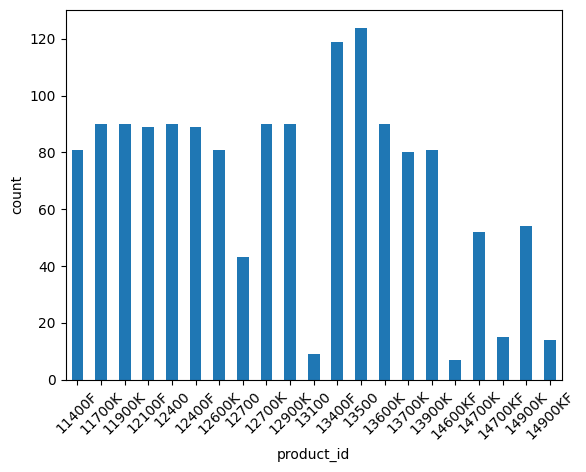

In [40]:
#Exploratory Data analysis
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker 
#Product ID - checking how many of each type of product is
df['product_id'].value_counts().sort_index().plot(kind='bar', rot=45, ylabel='count')
plt.show()
#there seems to be more entries of product 11 and 12, but  most of them have equal entries except for few which have less than 10 entries

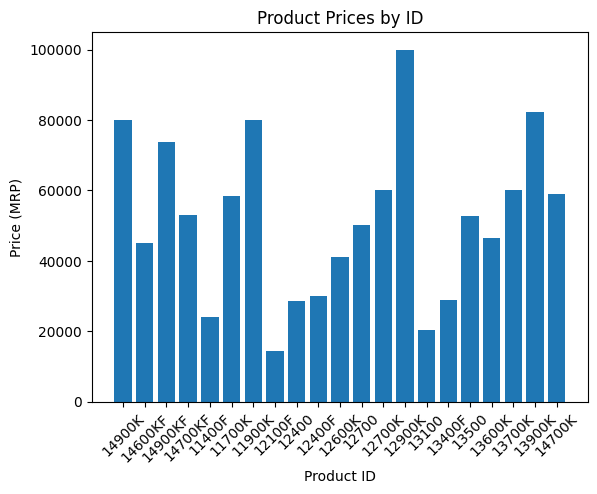

In [38]:
#product vs mrp
product_id= df['product_id'].unique()
id_mrp=[]
id_mrp = [{'id': i, 'mrp': df.loc[df['product_id'] == i, 'mrp'].iloc[0]} for i in df['product_id'].unique()]
product_ids = [entry['id'] for entry in id_mrp]
prices = [entry['mrp'] for entry in id_mrp]
plt.bar(product_ids, prices)
plt.xlabel('Product ID')
plt.ylabel('Price (MRP)')
plt.title('Product Prices by ID')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
#we can see that the product 12700k has the highest pricing

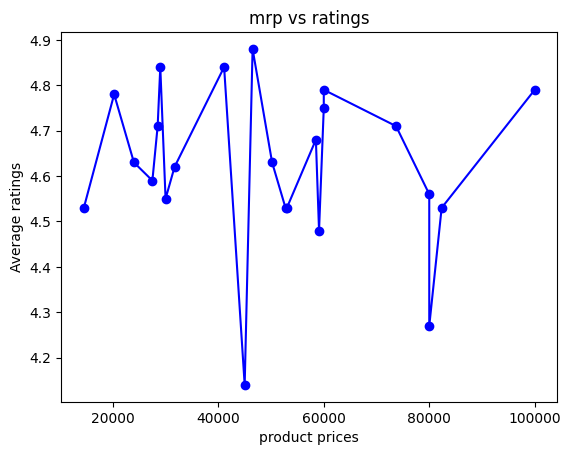

In [44]:
#avg rating vs price
from statistics import mean
avg_ratings= [{'mrp': i, 'avg': round(mean(df.loc[df['mrp'] == i, 'rating']),2)} for i in df['mrp'].unique()]
avg_ratings = sorted(avg_ratings, key=lambda d: d['mrp'])
x_values = [entry['mrp'] for entry in avg_ratings]
y_values = [entry['avg'] for entry in avg_ratings]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('product prices')
plt.ylabel('Average ratings')
plt.title('mrp vs ratings')
plt.show()
#there doesnt seem like there is any relation between product rating and mrp

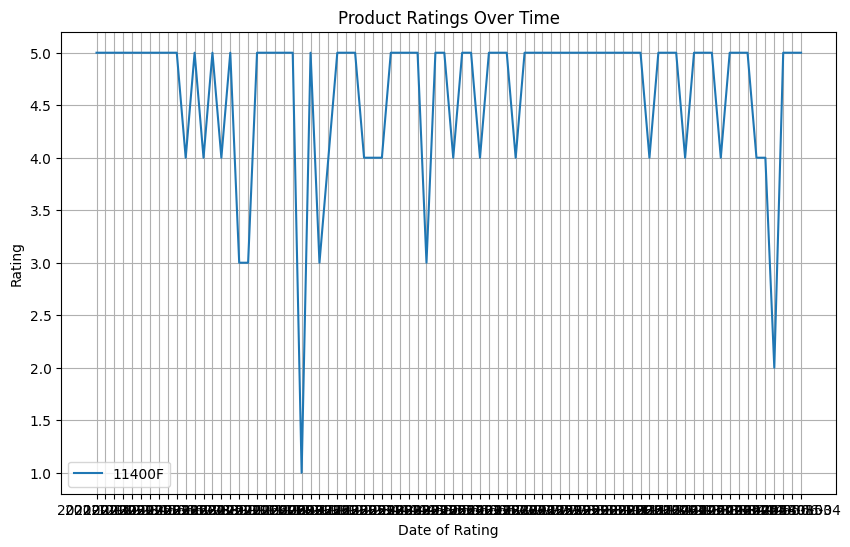

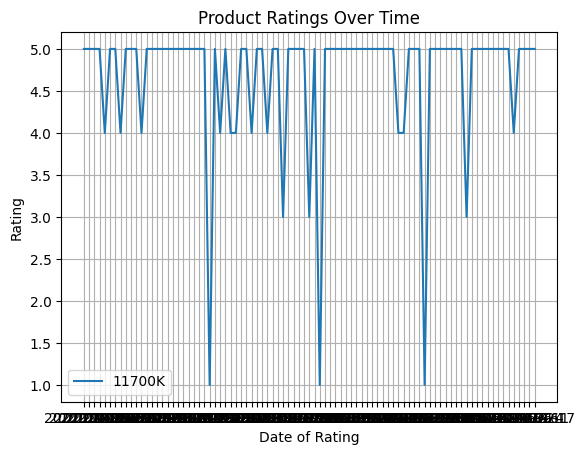

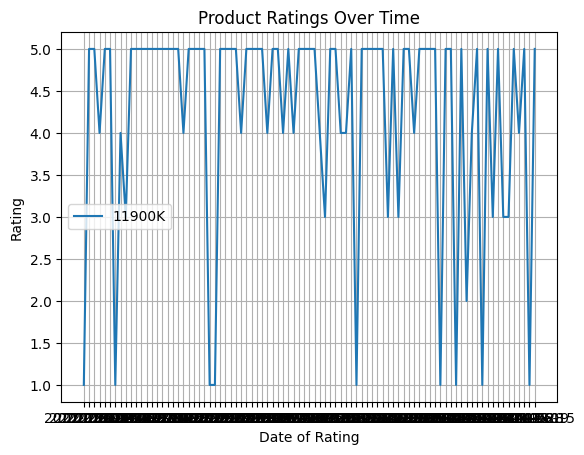

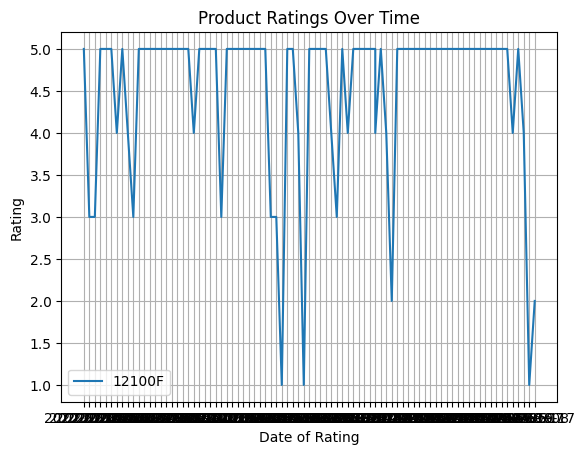

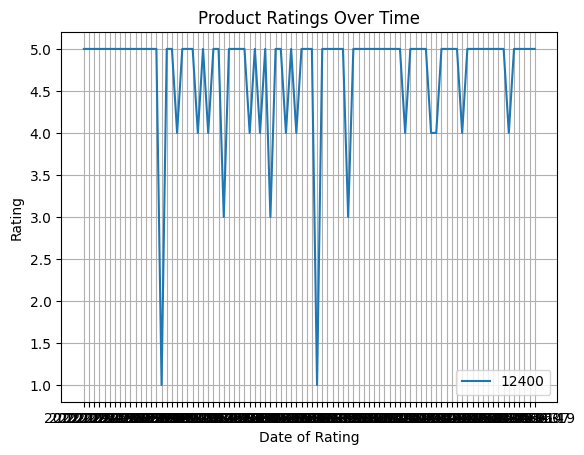

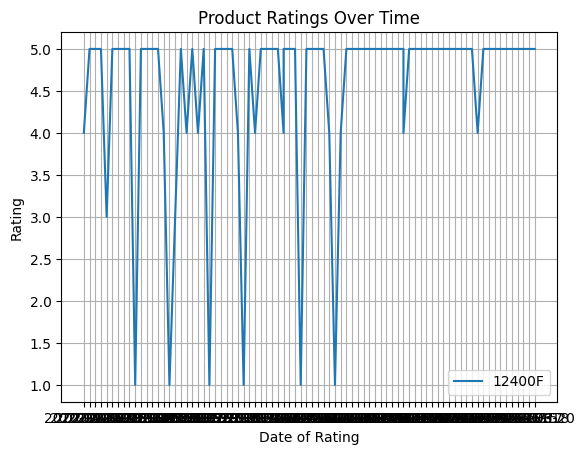

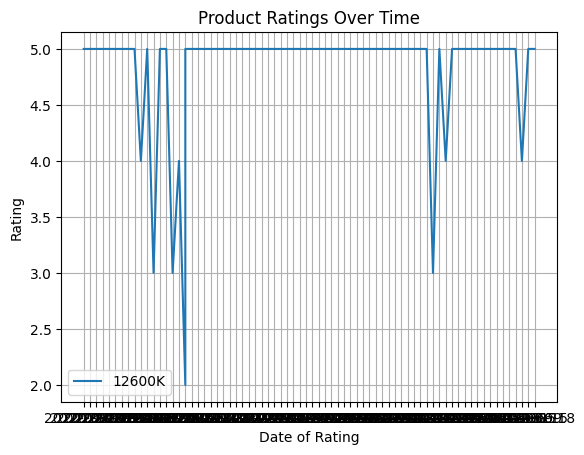

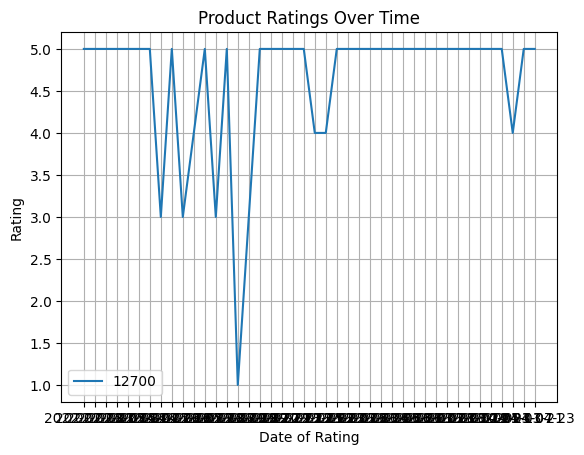

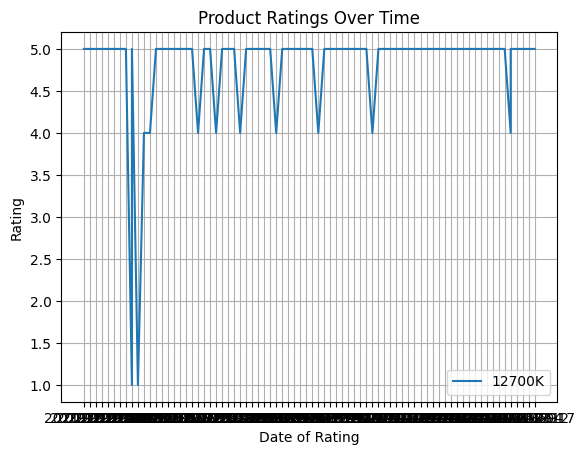

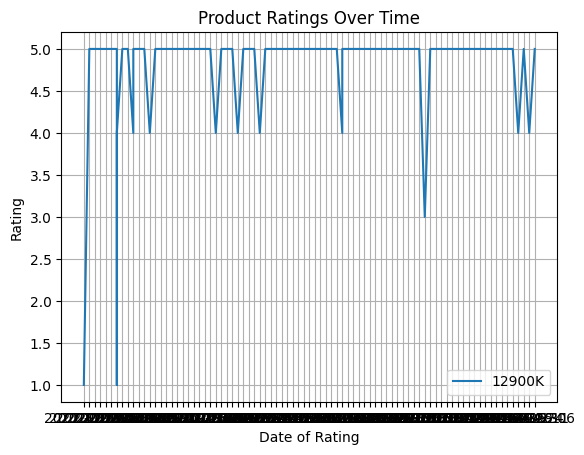

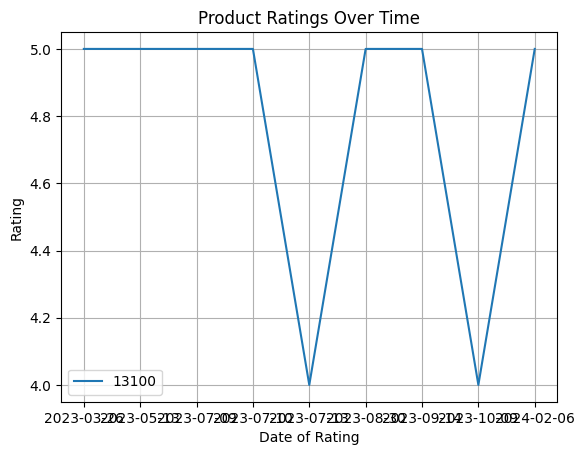

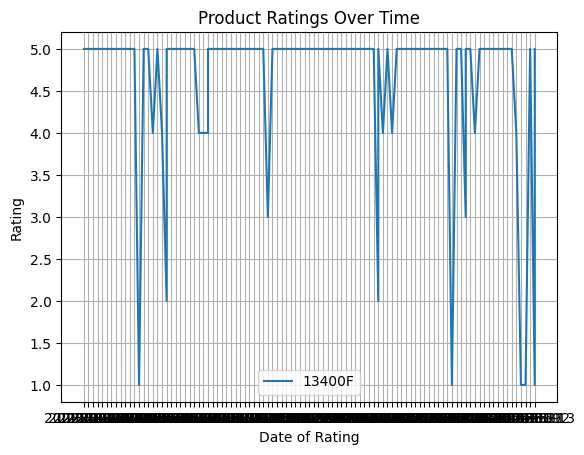

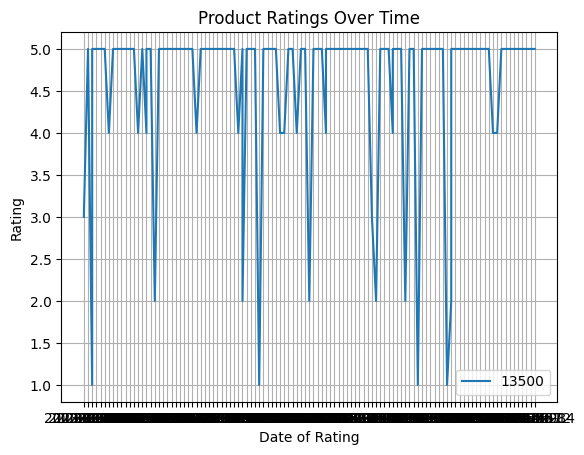

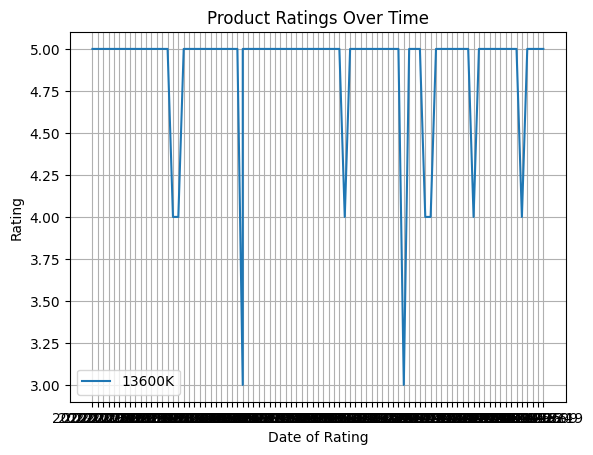

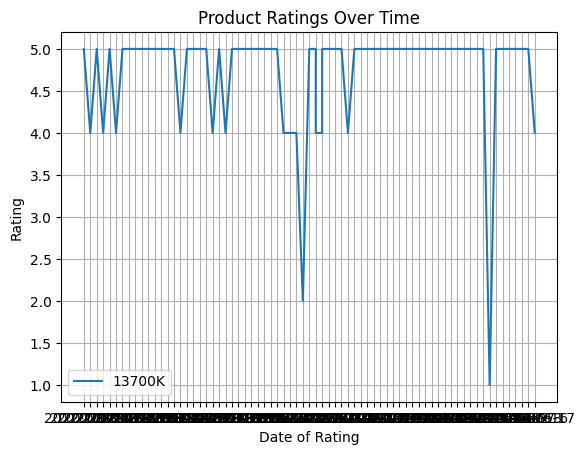

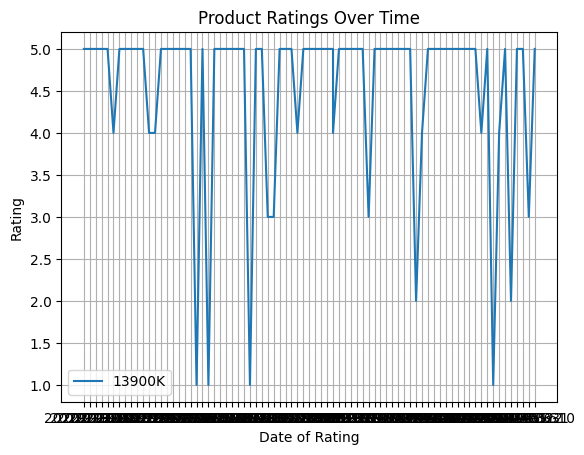

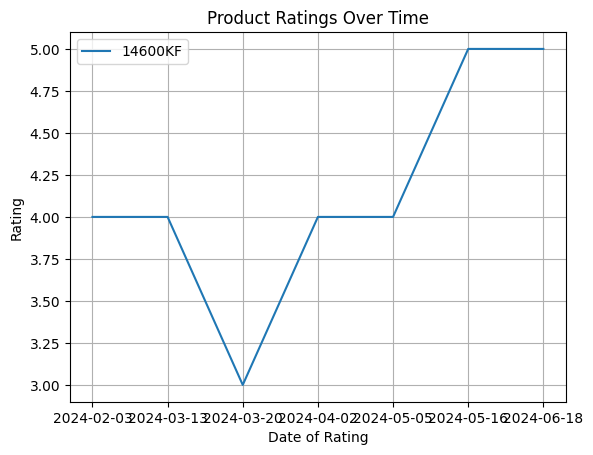

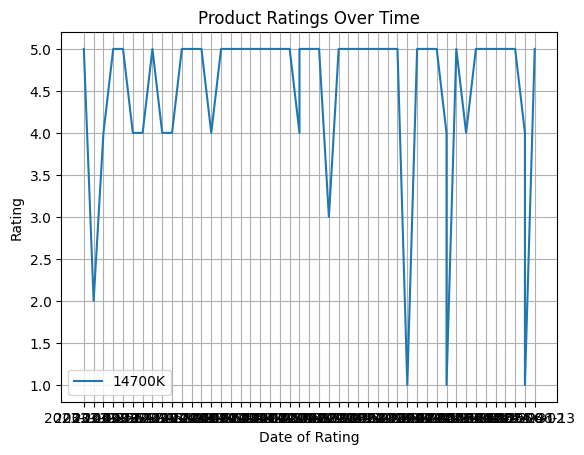

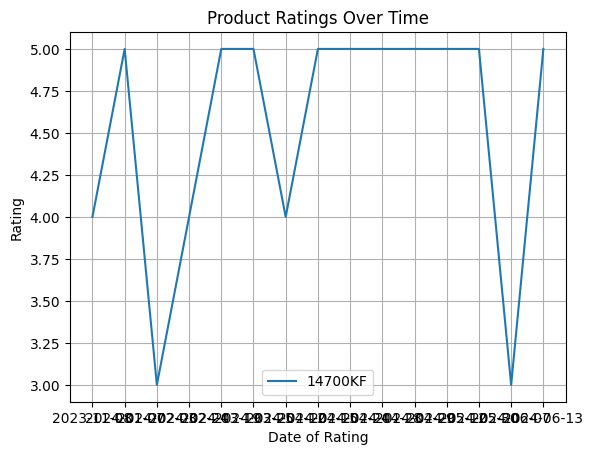

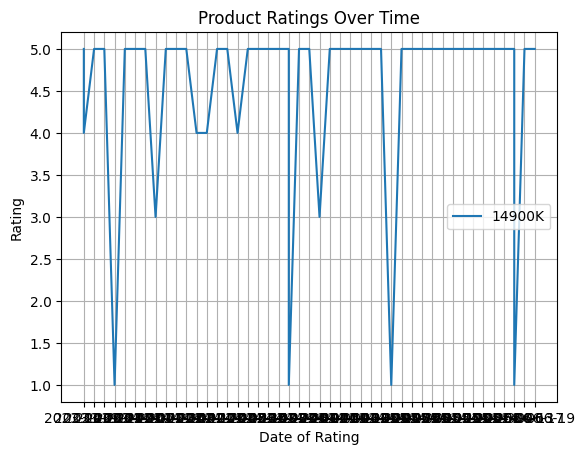

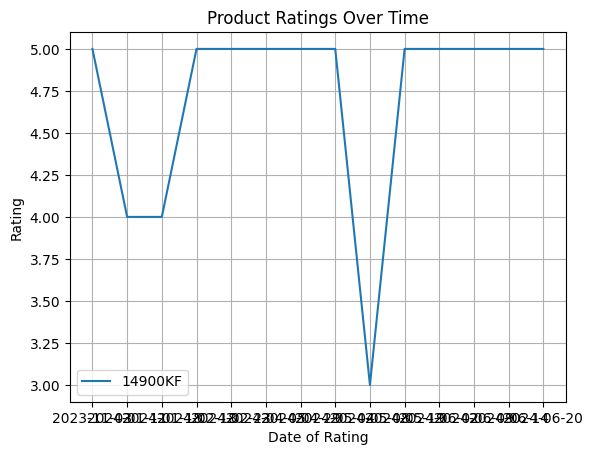

In [15]:
#the rating of people by timeline
df.sort_values(by='review_date', inplace=True)
df.reset_index(drop=True)
grouped_df = df.groupby('product_id')
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for product, group in grouped_df:
    plt.plot(group['review_date'], group['rating'], label=product)

    # Customize plot for each product (e.g., colors, markers, etc.)
    # You can add additional styling options here

    plt.xlabel('Date of Rating')
    plt.ylabel('Rating')
    plt.title('Product Ratings Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()